In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
df = pd.read_csv("redfin_data_cleaned.csv")

In [4]:
df.dtypes

ADDRESS            object
CITY               object
ZIPCODE             int64
LOCATION           object
DATESOLD           object
MONTH              object
PRICE               int64
BEDROOMS            int64
BATHROOMS         float64
SQFT                int64
LOTSIZE             int64
PRICE_PER_SQFT      int64
HOA                object
HOA_MONTHLY       float64
YEARBUILT           int64
HOUSE_AGE           int64
DAYS_ON_MARKET      int64
LATITUDE          float64
LONGITUDE         float64
dtype: object

In [5]:
# convert data types
df["ZIPCODE"] = df["ZIPCODE"].astype(str)
df["DATESOLD"] = pd.to_datetime(df["DATESOLD"])

In [6]:
df.describe()

,PRICE,BEDROOMS,BATHROOMS,SQFT,LOTSIZE,PRICE_PER_SQFT,HOA_MONTHLY,YEARBUILT,HOUSE_AGE,DAYS_ON_MARKET,LATITUDE,LONGITUDE
count,5.380000e+03,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000,5380.00000,5380.000000,5380.000000,5380.000000,5380.000000,5380.000000
mean,9.700636e+05,4.337918,3.462825,3419.514498,26984.856506,311.399442,31.92026,1980.835316,40.164684,181.527509,38.857755,-77.287290
std,4.626873e+05,0.884653,1.232957,1849.641935,44975.538756,104.929843,49.76509,19.203106,19.203106,92.526424,0.081655,0.103781
min,6.500000e+04,1.000000,1.000000,476.000000,1136.000000,54.000000,0.00000,1902.000000,0.000000,1.000000,38.635605,-77.552336
25%,7.038750e+05,4.000000,2.500000,2168.000000,9838.750000,242.000000,0.00000,1967.000000,27.000000,108.000000,38.795976,-77.359652
50%,8.327500e+05,4.000000,3.500000,2971.000000,12680.500000,291.000000,0.00000,1981.000000,40.000000,188.000000,38.858119,-77.280170
75%,1.055000e+06,5.000000,4.000000,4172.000000,22006.500000,355.000000,60.00000,1994.000000,54.000000,249.000000,38.915229,-77.212197
max,4.650000e+06,9.000000,10.500000,18653.000000,457728.000000,1518.000000,600.00000,2021.000000,119.000000,362.000000,39.051006,-77.044685


In [7]:
# average home prices by city 
df.groupby("CITY")["PRICE"].mean().reset_index().sort_values("PRICE", ascending=False)

,CITY,PRICE
17,Mclean,1.856555e+06
13,Great Falls,1.554403e+06
3,Arlington,1.415433e+06
19,Oakton,1.294900e+06
23,Vienna,1.187931e+06
8,Dunn Loring,1.114820e+06
18,Oak Hill,1.085700e+06
10,Fairfax Station,1.024491e+06
7,Clifton,9.800111e+05
11,Falls Church,9.473097e+05


In [8]:
# average price by month 
df.groupby(["MONTH"])["PRICE"].mean().reset_index().sort_values("PRICE",ascending=False)

,MONTH,PRICE
10,October,1.011308e+06
7,March,1.010719e+06
2,December,1.010491e+06
6,June,9.955083e+05
3,February,9.724347e+05
1,August,9.671950e+05
8,May,9.588374e+05
11,September,9.542915e+05
5,July,9.539773e+05
0,April,9.504505e+05


In [9]:
# pivot table, average home prices by city & zip code 
pd.pivot_table(df,index = ["CITY","ZIPCODE"], values = "PRICE").sort_values("CITY")

PRICE
CITY            ZIPCODE              
Aldie           20105    8.734857e+05
Alexandria      22314    1.090200e+06
                22312    7.489187e+05
                22311    8.821950e+05
                22310    7.392608e+05
                22309    7.180451e+05
                22308    9.694847e+05
                22315    7.523197e+05
                22306    6.760482e+05
                22305    1.113283e+06
                22304    1.167367e+06
                22303    5.348333e+05
                22302    1.343833e+06
                22301    1.099375e+06
                22307    1.039457e+06
Annandale       22003    7.772046e+05
Arlington       22213    1.618750e+06
                22207    1.698800e+06
                22206    6.250000e+05
                22204    7.500000e+05
                22205    9.000000e+05
Burke           22015    7.531702e+05
Centreville     20120    7.868706e+05
                20121    7.425892e+05
Chantilly       20151    7.366680e+05
                20152    9.055045e+05
Clifton         20124    9.800111e+05
Dunn Loring     22027    1.114820e+06
Fairfax         22033    8.654116e+05
                22032    7.832209e+05
                22031    8.993167e+05
                22030    8.317328e+05
Fairfax Station 22039    1.024491e+06
Falls Church    22041    8.623400e+05
                22042    7.636286e+05
                22043    1.166286e+06
                22044    9.691450e+05
                22046    1.097730e+06
Fort Belvoir    22060    6.933767e+05
Great Falls     22066    1.554403e+06
Herndon         20170    7.187535e+05
                20171    7.970905e+05
Lorton          22079    7.967827e+05
Mason Neck      22079    8.952500e+05
Mclean          22102    2.115356e+06
                22101    1.760351e+06
Oak Hill        20171    1.085700e+06
Oakton          22124    1.294900e+06
Reston          20190    9.599978e+05
                20191    7.760220e+05
                20194    9.850101e+05
Springfield     22150    6.247428e+05
                22151    6.777787e+05
                22152    7.200671e+05
                22153    7.263931e+05
Sterling        20165    8.192000e+05
Vienna          22180    1.199108e+06
                22181    1.167166e+06
                22182    1.192826e+06

In [10]:
# average home price based on attribute values 
df_pivot = df[['CITY','ZIPCODE','MONTH','HOA','BEDROOMS','BATHROOMS','YEARBUILT','PRICE']]

for x in df_pivot.columns:
    print(x)
    print(pd.pivot_table(df_pivot,index=x,values='PRICE'))

CITY
                        PRICE
CITY                         
Aldie            8.734857e+05
Alexandria       8.411740e+05
Annandale        7.772046e+05
Arlington        1.415433e+06
Burke            7.531702e+05
Centreville      7.764426e+05
Chantilly        8.366147e+05
Clifton          9.800111e+05
Dunn Loring      1.114820e+06
Fairfax          8.273920e+05
Fairfax Station  1.024491e+06
Falls Church     9.473097e+05
Fort Belvoir     6.933767e+05
Great Falls      1.554403e+06
Herndon          7.517138e+05
Lorton           7.967827e+05
Mason Neck       8.952500e+05
Mclean           1.856555e+06
Oak Hill         1.085700e+06
Oakton           1.294900e+06
Reston           8.598052e+05
Springfield      6.990055e+05
Sterling         8.192000e+05
Vienna           1.187931e+06
ZIPCODE
                PRICE
ZIPCODE              
20105    8.734857e+05
20120    7.868706e+05
20121    7.425892e+05
20124    9.800111e+05
20151    7.366680e+05
20152    9.055045e+05
20165    8.192000e+05
20170    

ValueError: Grouper for 'PRICE' not 1-dimensional

In [ ]:
# highly correlated attribute pairs
corr_pairs = df.apply(lambda x: x.factorize()[0]).corr().unstack().sort_values(kind="quicksort")
strong_pairs = corr_pairs[abs(corr_pairs) > 0.5]
print(strong_pairs)

In [ ]:
# attribute correlation matrix heatmap
sns.heatmap(df.apply(lambda x: x.factorize()[0]).corr(),cmap="Blues", annot=True).set(title="Correlation Matrix")

graph for CITY: total = 24


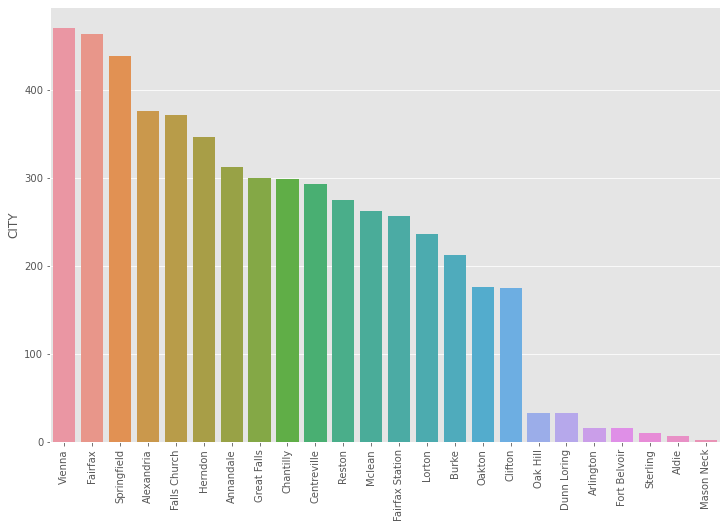

graph for ZIPCODE: total = 57


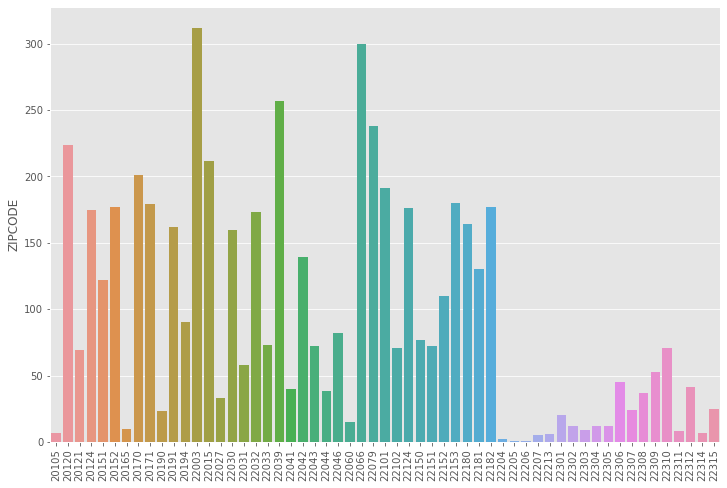

graph for MONTH: total = 12


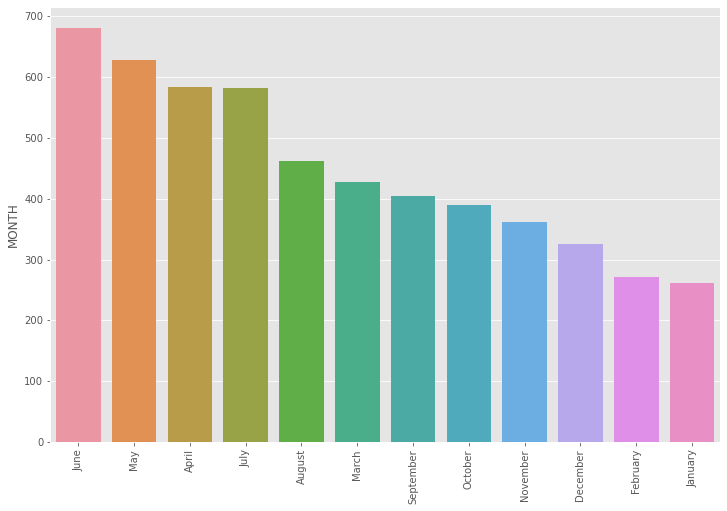

graph for BEDROOMS: total = 9


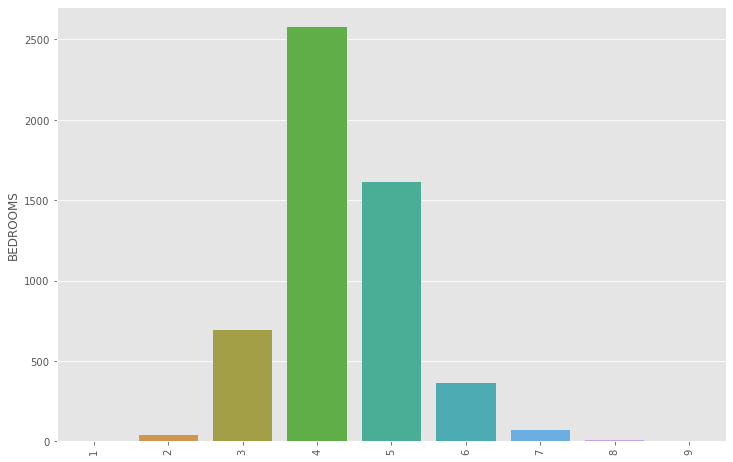

graph for BATHROOMS: total = 20


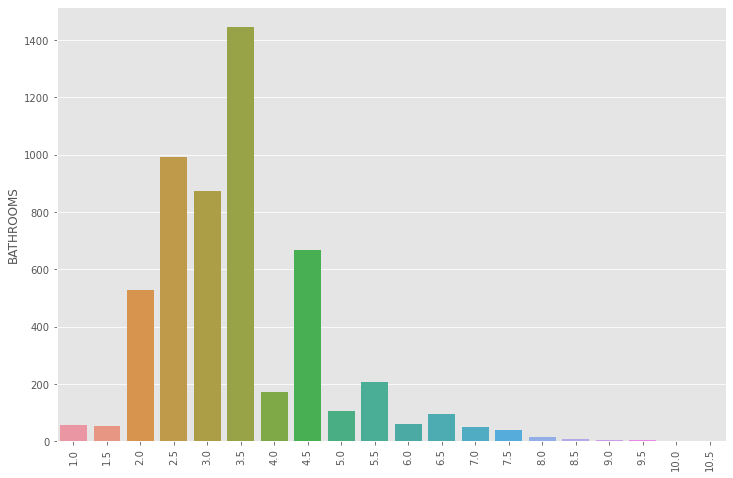

graph for HOA: total = 2


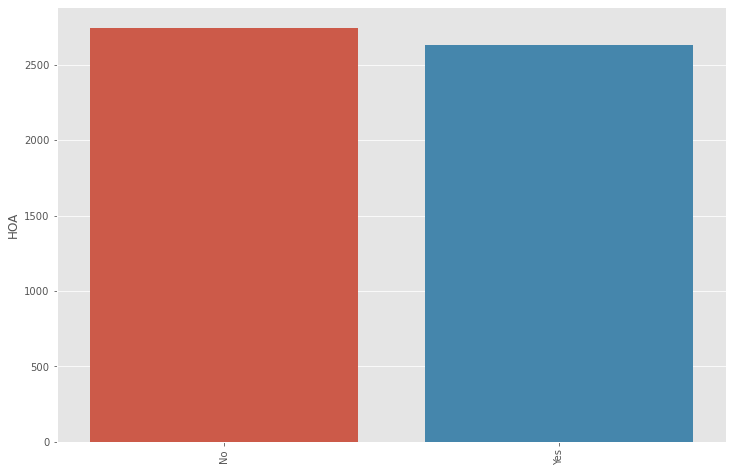

In [12]:
# attribute visualizations 
df_categories = df[["CITY","ZIPCODE","MONTH","BEDROOMS","BATHROOMS","HOA"]]

for x in df_categories.columns:
 cat_num = df_categories[x].value_counts()
 print("graph for %s: total = %d" % (x, len(cat_num)))
 chart = sns.barplot(x=cat_num.index,y=cat_num)
 chart.set_xticklabels(chart.get_xticklabels(), rotation =90)
 plt.show()

Text(0, 0.5, 'House Price in Millions')

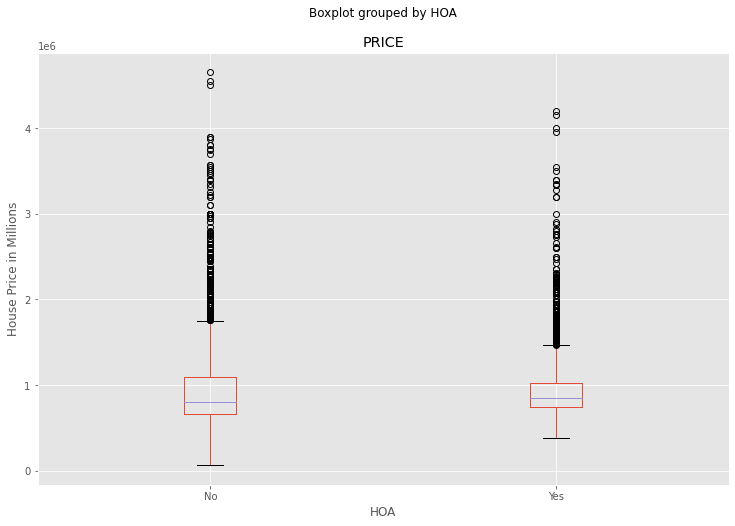

In [11]:
# boxplot by HOA
df.boxplot(column='PRICE', by='HOA')
plt.ylabel("House Price in Millions")

In [ ]:
# histogram, distribution of home prices between 5th and 95th percentiles 
df_percent = df[(df["PRICE"]>df.PRICE.quantile(q=0.05)) & (df["PRICE"]<df.PRICE.quantile(q=0.95))]
price_in_100k = df_percent["PRICE"]/100000
plt.hist(x=price_in_100k,align="mid",color="blue", edgecolor='black', linewidth=1.2)
plt.ylabel("Frequency")
plt.xlabel("Price in $100k")
plt.title("Distribution of House Prices")
plt.show()

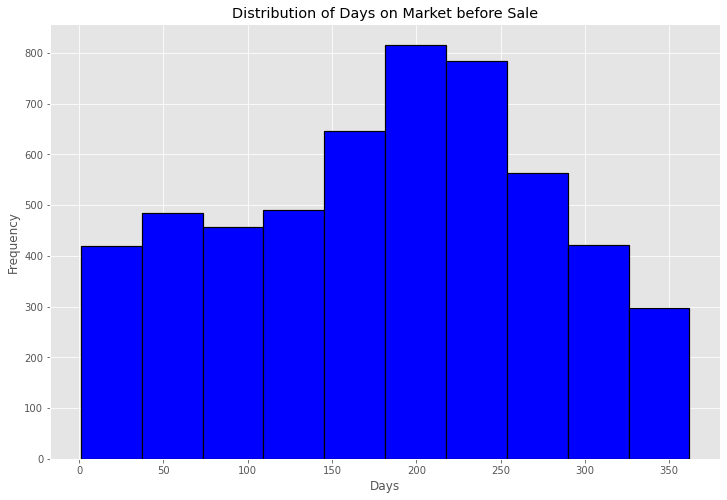

In [13]:
# distribution of days homes are on market before they are sold
plt.hist(x=df["DAYS_ON_MARKET"], align="mid", color="blue", bins=10, edgecolor='black', linewidth=1.2)
plt.ylabel("Frequency")
plt.xlabel("Days")
plt.title("Distribution of Days on Market before Sale")
plt.show()

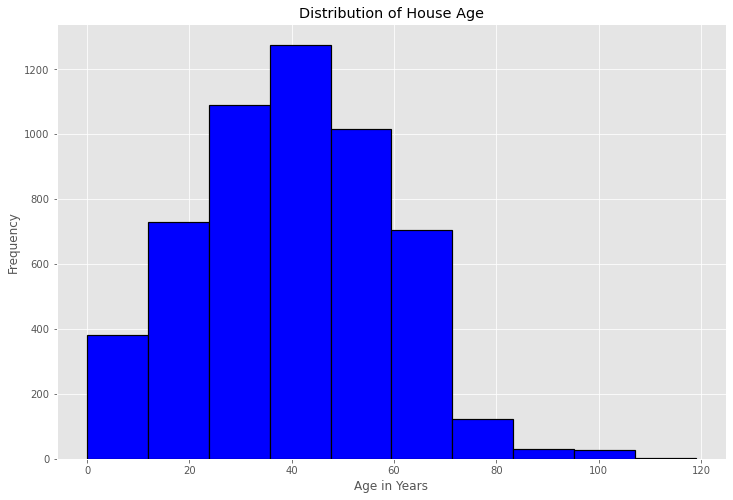

In [14]:
# histogram distribution of the age of houses  
plt.hist(x=df["HOUSE_AGE"], align="mid", color="blue", bins=10, edgecolor='black', linewidth=1.2)
plt.ylabel("Frequency")
plt.xlabel("Age in Years")
plt.title("Distribution of House Age")
plt.show()

In [ ]:
# scatterplot for home prices by sqft
price_100 = df["PRICE"]/100000
plt.scatter(x=df["SQFT"],y=price_100,color="blue")
plt.ylabel("Price in $100k")
plt.xlabel("Square Feet")
plt.title("Price by Sqft")
plt.show()